# Assignment-5

This notebook contains the questions to test the proficiency in `Mathematics for machine learning`.

### Date: 16th June, 2025

### Steps to solve and upload the assignment 

- Download the notebook in your local machine.
- Solve the coding questions in the notebook and save it.
- Rename the file as `Assignment-05-<your_name>_<your_surname>.ipynb`. For example if your name is Dipika Chopra then name the file as `Assignment-05-Dipika_Chopra.ipynb`.
- For numerical problems you can either solve the same using `LaTeX` in markdown cell of your soluton notebook or you can solve it on paper and upload the scan pdf copy of the solution.
- If you are solving it on paper then name the pdf file of the scan copy of the solution as `Assignment-05-<your_name>_<your_surname>.pdf`. For example if your name is Akash Kumar then name the file as `Assignment-05-Akash_Kumar.pdf`.
- Upload the solved notebook and the scanned pdf copy of the solutions in the google drive location: https://drive.google.com/drive/folders/1rlxuCIMhIk3qIM4BIWGjTwe7o6pojKKS?usp=drive_link
<h3><span style="color:red"> Deadline: 4th July, 2025 </span></h3>

<h5><span style="color:blue"> <b>Instructions:</b> Please answer all the questions. For problems requiring numerical solutions, you are encouraged to write code in Python to compute the results. Show your steps and explain your reasoning. </span></h5>

### Problem-1

In a network, data packets are sent through a shared channel. Suppose there are 10 devices attempting to send data. In any given time slot, each device has a 20% chance of attempting to send a packet, independently of other devices. A collision occurs if two or more devices attempt to send a packet in the same time slot. What is the probability that in a given time slot, there will be no collisions?

### Solution

No collision can happen in two scenarios:

1. No device attempts to send a packet. Lets the probability of this is $P_A$.

2. Exactly one device attempts to send a packet. Lets the probability is $P_B$.

**1: Probability that no devices sends a packet.**

Since each device's attempt is independent, the probability that none of the 10 devices send a packet is the product of ther individual probabilities of not sending.

Now $P(not sending) = 1 - P(sending) = 1 - 0.02 = 0.8$ 

Hence, $P_A = 0.8^{10} = 0.1074$

**2: Probability that exactly one device sends a packet.**

This is a binomial probability problem. The formula for the probability of exactly k successes in n trials is:
$P(X=k) = \binom{n}{k} p^k (1-p)^{(n-k)}$

In this case, we want k=1 (exactly one device sends a packet):

$P_B = \binom{10}{1} \times (0.20)^1 \times (0.80)^{(10-1)}$

$P_B = 10 \times 0.20 \times (0.80)^9$

$P_B = 2 \times 0.80^9 = 0.2684$

Therefore, the probability of no collision = $P_A + P_B = 0.1074 + 0.2684 = 0.3758$ 

In [1]:
import math

def calculate_no_collision_probability(num_devices, prob_send):
    """
    Calculates the probability of no collisions in a network given the number of devices
    and the probability of each device attempting to send a packet.

    Args:
        num_devices (int): The total number of devices in the network.
        prob_send (float): The probability (between 0 and 1) that a single device
                           attempts to send a packet in a given time slot.

    Returns:
        float: The probability that there will be no collisions in a given time slot.
               No collisions occur if either 0 devices send or exactly 1 device sends.
    """

    # Ensure probabilities are within a valid range
    if not (0 <= prob_send <= 1):
        print("Error: Probability of sending must be between 0 and 1.")
        return None

    # Step 1: Probability that a single device does not send a packet
    # This is (1 - p)
    prob_not_send = 1 - prob_send
    print(f"Probability that a single device does not send a packet: {prob_not_send:.4f}")

    # Step 2: Probability that no device sends a packet (X=0)
    # This is (1 - p)^n
    prob_no_device_sends = prob_not_send ** num_devices
    print(f"Probability that no device sends a packet (X=0): {prob_no_device_sends:.4f}")

    # Step 3: Probability that exactly one device sends a packet (X=1)
    # Using the binomial probability formula: P(X=k) = C(n, k) * p^k * (1-p)^(n-k)
    # For k=1, C(n, 1) = n
    # P(X=1) = n * p^1 * (1-p)^(n-1)
    prob_exactly_one_device_sends = num_devices * (prob_send ** 1) * (prob_not_send ** (num_devices - 1))
    print(f"Probability that exactly one device sends a packet (X=1): {prob_exactly_one_device_sends:.4f}")

    # Step 4: Probability of no collisions
    # No collisions means either 0 devices send OR 1 device sends.
    # These are mutually exclusive events, so we sum their probabilities.
    prob_no_collisions = prob_no_device_sends + prob_exactly_one_device_sends
    print(f"Probability of no collisions: {prob_no_collisions:.4f}")

    return prob_no_collisions

num_devices = 10  # n
prob_send = 0.20  # p

print(f"Calculating probability of no collisions for:")
print(f"  Number of devices (n): {num_devices}")
print(f"  Probability of sending (p): {prob_send}\n")

result = calculate_no_collision_probability(num_devices, prob_send)

print(f"\nFinal result: The probability of no collisions is approximately {result:.4f}")

Calculating probability of no collisions for:
  Number of devices (n): 10
  Probability of sending (p): 0.2

Probability that a single device does not send a packet: 0.8000
Probability that no device sends a packet (X=0): 0.1074
Probability that exactly one device sends a packet (X=1): 0.2684
Probability of no collisions: 0.3758

Final result: The probability of no collisions is approximately 0.3758


### Problem-2

A system uses 8-character passwords. Each character can be any lowercase letter (a-z), uppercase letter (A-Z), or digit (0-9).
What is the probability that a randomly generated 8-character password contains at least one digit, given that character repetition is allowed?

### Solution

**Determine the total number of possible characters**

Lowercase letters (a-z): 26 characters

Uppercase letters (A-Z): 26 characters

Digits (0-9): 10 characters

Total possible characters = $26 + 26 + 10 = 62$ characters

**Calculate the total number of possible 8-character passwords**

Since character repetition is allowed and each position can be filled independently:

Total possible passwords = $62^8$

**Calculate the number of passwords with NO digits**

If we exclude digits, we only have:

Lowercase letters (a-z): 26 characters

Uppercase letters (A-Z): 26 characters

Total non-digit characters = $26 + 26 = 52$ characters

Number of passwords with no digits = $52^8$

**Calculate the number of passwords with at least one digit**

Using the complement principle:

Passwords with at least one digit = Total passwords - Passwords with no digits

Passwords with at least one digit = $62^8 - 52^8$

**Calculate the probability**

$P(\text{at least one digit}) = \frac{62^8 - 52^8}{62^8}$

$P(\text{at least one digit}) = 1 - \frac{52^8}{62^8}$

$P(\text{at least one digit}) = 1 - \left(\frac{52}{62}\right)^8$

$P(\text{at least one digit}) = 1 - \left(\frac{26}{31}\right)^8$

$P(\text{at least one digit}) = 1 - (0.8387)^8$

$P(\text{at least one digit}) = 1 - 0.2476$

$P(\text{at least one digit}) = 0.7524$


The probability that a randomly generated 8-character password contains at least one digit is approximately 0.7524 or 75.24%.



### Problem-3

A software project has two modules, A and B. The probability that module A has a bug is 0.15, and the probability that module B has a bug is 0.10. The probability that both modules have bugs is 0.03.

(a) What is the probability that module A has a bug, given that module B has a bug?

(b) What is the probability that module B has a bug, given that module A does not have a bug?

### Solution

**Define the given probabilities**

Let's define the events:

$A$: Module A has a bug

$B$: Module B has a bug

Given probabilities:

$P(A) = 0.15$ (probability that module A has a bug)

$P(B) = 0.10$ (probability that module B has a bug)

$P(A \cap B) = 0.03$ (probability that both modules have bugs)

**Solve part (a): $P(A|B)$**

We need to find the probability that module A has a bug, given that module B has a bug.

Using the definition of conditional probability:

$P(A|B) = \frac{P(A \cap B)}{P(B)}$

Substituting the given values:

$P(A|B) = \frac{0.03}{0.10} = 0.30$

Answer (a): The probability that module A has a bug, given that module B has a bug, is 0.30 or 30%.

**Solve part (b): $P(B|A^c)$**

We need to find the probability that module B has a bug, given that module A does not have a bug.

First, let's find $P(A^c \cap B)$:

$P(A^c \cap B) = P(B) - P(A \cap B)$

$P(A^c \cap B) = 0.10 - 0.03 = 0.07$

Next, find $P(A^c)$:

$P(A^c) = 1 - P(A) = 1 - 0.15 = 0.85$

Now, using the definition of conditional probability:

$P(B|A^c) = \frac{P(A^c \cap B)}{P(A^c)}$

Substituting the calculated values:

$P(B|A^c) = \frac{0.07}{0.85} = 0.0824$

Answer (b): The probability that module B has a bug, given that module A does not have a bug, is approximately 0.0824 or 8.24%.

### Problem-4

A robot uses a sensor to detect an obstacle. The sensor has a 95% chance of correctly detecting an obstacle when one is present (true positive rate). However, it also has a 2% chance of indicating an obstacle when there isn't one (false positive rate).
In the robot's environment, obstacles are present 10% of the time.

What is the probability that an obstacle is truly present, given that the sensor indicates an obstacle?

### Solution

**Define the events and given probabilities**

Let's define the events:
- $O$: Obstacle is truly present
- $S$: Sensor indicates an obstacle

Given probabilities:
- $P(O) = 0.10$ (obstacles are present 10% of the time)
- $P(S|O) = 0.95$ (true positive rate - sensor correctly detects when obstacle is present)
- $P(S|O^c) = 0.02$ (false positive rate - sensor incorrectly indicates obstacle when none present)

**Find the probability that sensor indicates an obstacle**

Using the law of total probability:
$P(S) = P(S|O) \cdot P(O) + P(S|O^c) \cdot P(O^c)$

We need $P(O^c)$:
$P(O^c) = 1 - P(O) = 1 - 0.10 = 0.90$

Substituting:
$P(S) = 0.95 \times 0.10 + 0.02 \times 0.90$
$P(S) = 0.095 + 0.018 = 0.113$

**Find the probability that obstacle is present given sensor indicates obstacle**

Using Bayes' theorem:
$P(O|S) = \frac{P(S|O) \cdot P(O)}{P(S)}$

Substituting the values:
$P(O|S) = \frac{0.95 \times 0.10}{0.113}$
$P(O|S) = \frac{0.095}{0.113} = 0.8407$

The result $P(O|S) = 0.8407$ means that when the sensor indicates an obstacle, there's about an 84.07% chance that an obstacle is truly present.

### Problem-5

A spam filter uses a keyword "money" to identify spam emails.
- 10% of all emails are spam.
- If an email is spam, the word "money" appears in it 80% of the time.
- If an email is not spam, the word "money" appears in it 5% of the time.

If an email contains the word "money", what is the probability that it is spam?

### Solution

**Define the events and given probabilities**

Let's define the events:

- $S$: Email is spam

- $M$: Email contains the word "money"

Given probabilities:

- $P(S) = 0.10$ (10% of all emails are spam)

- $P(M|S) = 0.80$ (if email is spam, "money" appears 80% of the time)

- $P(M|S^c) = 0.05$ (if email is not spam, "money" appears 5% of the time)

**Find the probability that an email contains the word "money"**

Using the law of total probability:

$P(M) = P(M|S) \cdot P(S) + P(M|S^c) \cdot P(S^c)$

We need $P(S^c)$:

$P(S^c) = 1 - P(S) = 1 - 0.10 = 0.90$

Substituting:

$P(M) = 0.80 \times 0.10 + 0.05 \times 0.90$

$P(M) = 0.08 + 0.045 = 0.125$

**Find the probability that an email is spam given it contains "money"**

Using Bayes' theorem:

$P(S|M) = \frac{P(M|S) \cdot P(S)}{P(M)}$

Substituting the values:

$P(S|M) = \frac{0.80 \times 0.10}{0.125}$

$P(S|M) = \frac{0.08}{0.125} = 0.64$

### Problem-6

A rare disease affects 1 in 10,000 people. A diagnostic test for this disease has a 99% true positive rate (correctly identifies the disease when present) and a 0.5% false positive rate (incorrectly indicates the disease when not present).

If a randomly selected person tests positive for the disease, what is the probability that they actually have the disease?

### Solution

**Define the Events and Probabilities**

Let's define the events:

- $D$: Person has the disease

- $D^c$: Person does not have the disease

- $T^+$: Test result is positive

- $T^-$: Test result is negative

Given probabilities:

- $P(D)$ = 1/10,000 = 0.0001 (prevalence of the disease)

- $P(T^+|D)$ = 0.99 (true positive rate)

- $P(T^+|D^c)$ = 0.005 (false positive rate)

**Calculate Complementary Probabilities**

We need to find:

- $P(D^c) = 1 - P(D)$ = 1 - 0.0001 = 0.9999

- $P(T^-|D) = 1 - P(T^+|D)$ = 1 - 0.99 = 0.01 (false negative rate)

- $P(T^-|D^c) = 1 - P(T^-|D^c)$ = 1 - 0.005 = 0.995 (true negative rate)

**Apply Bayes' Theorem**

We want to find $P(D|T^+)$, the probability that a person has the disease given they tested positive.

Using Bayes' Theorem:

$$P(D|T^+) = \frac{P(T^+|D) \cdot P(D)}{P(T^+)}$$

**Calculate $P(T^+)$ using Law of Total Probability**

$$P(T^+) = P(T^+|D) \cdot P(D) + P(T^+|D^c) \cdot P(D^c)$$

Substituting the values:

$$P(T^+) = 0.99 \times 0.0001 + 0.005 \times 0.9999$$

$$P(T^+) = 0.000099 + 0.0049995$$

$$P(T^+) = 0.0050985$$

**Calculate the Final Probability**

Now we can calculate P(D|T⁺):

$$P(D|T^+) = \frac{0.99 \times 0.0001}{0.0050985}$$

$$P(D|T^+) = \frac{0.000099}{0.0050985}$$

$$P(D|T^+) = 0.0194$$

Hence the proability that a person tested positive has the disease = 0.0194 

### Problem-7

A batch of 500 microchips is produced. The probability that a single microchip is defective is 0.02.
Let X be the number of defective microchips in a random sample of 20 microchips from this batch. Assume the sample is taken with replacement, or the batch is large enough that we can model this as independent trials.

(a) What is the probability that exactly 3 microchips in the sample are defective?

(b) What is the probability that at least 2 microchips in the sample are defective?

### Solution

This is a Binomial Distribution problem because:

- We have a fixed number of trials (n = 20 microchips)

- Each trial has two possible outcomes (defective or non-defective)

- The probability of success (defective) is constant (p = 0.02)

- Trials are independent

Parameters:

- n = 20 (sample size)

- p = 0.02 (probability of defective microchip)

- q = 1 - p = 0.98 (probability of non-defective microchip)

**Binomial Probability Formula**

The probability mass function for a binomial distribution is:

$$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$$

Where:

$\binom{n}{k}$ is the binomial coefficient (number of ways to choose k successes from n trials)

$p^k$ is the probability of k successes

$(1-p)^{n-k}$ is the probability of (n-k) failures

**Solve Part (a) - Exactly 3 Defective Microchips**

We need to find $P(X = 3)$.

Using the binomial formula:

$$P(X = 3) = \binom{20}{3} \times (0.02)^3 \times (0.98)^{17}$$

Calculate the binomial coefficient:

$$\binom{20}{3} = \frac{20!}{3!(20-3)!} = \frac{20!}{3! \times 17!} = \frac{20 \times 19 \times 18}{3 \times 2 \times 1} = 1140$$

Calculate the probability:

$$P(X = 3) = 1140 \times (0.02)^3 \times (0.98)^{17}$$

$$P(X = 3) = 1140 \times 0.000008 \times 0.7093$$

$$P(X = 3) = 1140 \times 0.0000056744$$

$$P(X = 3) = 0.00647$$

Answer (a): The probability that exactly 3 microchips are defective is approximately 0.00647 or 0.647%.

**Solve Part (b) - At Least 2 Defective Microchips**

We need to find $P(X \geq 2)$.

Using the complement rule:

$$P(X \geq 2) = 1 - P(X < 2) = 1 - [P(X = 0) + P(X = 1)]$$

Calculate $P(X = 0)$:

$$P(X = 0) = \binom{20}{0} \times (0.02)^0 \times (0.98)^{20}$$

$$P(X = 0) = 1 \times 1 \times (0.98)^{20}$$

$$P(X = 0) = (0.98)^{20} = 0.6676$$

Calculate $P(X = 1)$:

$$P(X = 1) = \binom{20}{1} \times (0.02)^1 \times (0.98)^{19}$$

$$P(X = 1) = 20 \times 0.02 \times (0.98)^{19}$$

$$P(X = 1) = 20 \times 0.02 \times 0.6812$$

$$P(X = 1) = 0.2725$$

Calculate $P(X ≥ 2)$:

$$P(X \geq 2) = 1 - [P(X = 0) + P(X = 1)]$$

$$P(X \geq 2) = 1 - [0.6676 + 0.2725]$$

$$P(X \geq 2) = 1 - 0.9401$$

$$P(X \geq 2) = 0.0599$$

Answer (b): The probability that at least 2 microchips are defective is approximately 0.0599 or 5.99%.

### Problem-8

The time (in hours) until a critical server component fails follows an exponential distribution with a mean of 500 hours.

(a) What is the probability that the component will last between 400 and 600 hours?

(b) The component has already been running for 300 hours without failure. What is the probability that it will last for at least another 250 hours?

### Solution

The exponential distribution is characterized by:

- Probability Density Function (PDF): $f(x) = \lambda e^{-\lambda x}$ for $x \geq 0$

- Cumulative Distribution Function (CDF): $F(x) = 1 - e^{-\lambda x}$ for $x \geq 0$

- Mean: $\mu = \frac{1}{\lambda}$

- Memoryless Property: $P(X > s + t | X > s) = P(X > t)$. 

Learn more about memoryless property [here](https://pages.cs.wisc.edu/~dsmyers/cs547/lecture_9_memoryless_property.pdf).

**Calculate the Rate Parameter $\lambda$**

Given the mean $\mu = 500$ hours:

$$\mu = \frac{1}{\lambda}$$

$$\lambda = \frac{1}{\mu} = \frac{1}{500} = 0.002 \text{ per hour}$$

**Solve Part (a) - Component Lasts Between 400 and 600 Hours**

We need to find $P(400 \leq X \leq 600)$.

Using the CDF:

$$P(400 \leq X \leq 600) = F(600) - F(400)$$

Calculate F(400):

$$F(400) = 1 - e^{-\lambda \times 400} = 1 - e^{-0.002 \times 400} = 1 - e^{-0.8}$$

$$F(400) = 1 - 0.4493 = 0.5507$$

Calculate F(600):

$$F(600) = 1 - e^{-\lambda \times 600} = 1 - e^{-0.002 \times 600} = 1 - e^{-1.2}$$

$$F(600) = 1 - 0.3012 = 0.6988$$

Calculate the probability:

$$P(400 \leq X \leq 600) = F(600) - F(400) = 0.6988 - 0.5507 = 0.1481$$

Answer (a): The probability that the component will last between 400 and 600 hours is approximately 0.1481 or 14.81%.

**Solve Part (b) - Memoryless Property Application**

The component has already been running for 300 hours without failure. We need to find the probability that it will last for at least another 250 hours.

This is a conditional probability: $P(X > 550 | X > 300)$

Using the Memoryless Property:

$$P(X > 550 | X > 300) = P(X > 250)$$

This is because the exponential distribution has the memoryless property - the remaining lifetime has the same distribution regardless of how long the component has already been running.

Calculate P(X > 250):

$$P(X > 250) = 1 - F(250) = 1 - (1 - e^{-\lambda \times 250}) = e^{-\lambda \times 250}$$

$$P(X > 250) = e^{-0.002 \times 250} = e^{-0.5} = 0.6065$$

Answer (b): The probability that the component will last for at least another 250 hours, given it has already been running for 300 hours, is approximately 0.6065 or 60.65%.

**Alternative Calculation for Part (b)**

We can also verify using the direct conditional probability formula:

$$P(X > 550 | X > 300) = \frac{P(X > 550)}{P(X > 300)}$$

Calculate P(X > 550):

$$P(X > 550) = e^{-\lambda \times 550} = e^{-1.1} = 0.3329$$

Calculate P(X > 300):

$$P(X > 300) = e^{-\lambda \times 300} = e^{-0.6} = 0.5488$$

Calculate the conditional probability:

$$P(X > 550 | X > 300) = \frac{0.3329}{0.5488} = 0.6065$$

This confirms our previous result using the memoryless property.

### Problem-9

The noise in a sensor's reading can be modeled by a Gaussian (Normal) distribution with a mean of 0 (bias) and a standard deviation of 0.5 units.

(a) What is the probability that a sensor reading's noise is between -0.2 and 0.3 units?

(b) If a reading is considered an "outlier" if its noise is more than 1.5 standard deviations away from the mean, what is the probability that a random reading is an outlier?

### Solution

**Normal Distribution Properties**

The normal distribution is characterized by:

- Probability Density Function (PDF): $f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

- Cumulative Distribution Function (CDF): $\Phi(z) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{z} e^{-\frac{t^2}{2}} dt$

- Standard Normal Distribution: $Z = \frac{X - \mu}{\sigma} \sim N(0, 1)$

Given Parameters:

- Mean: $\mu = 0$ units

- Standard Deviation: $\sigma = 0.5$ units

**Solve Part (a) - Noise Between -0.2 and 0.3 Units**

We need to find $P(-0.2 \leq X \leq 0.3)$.

*__Convert to Standard Normal Distribution__*

Using the z-score transformation: $Z = \frac{X - \mu}{\sigma}$

For X = -0.2:

$$z_1 = \frac{-0.2 - 0}{0.5} = \frac{-0.2}{0.5} = -0.4$$

For X = 0.3:

$$z_2 = \frac{0.3 - 0}{0.5} = \frac{0.3}{0.5} = 0.6$$

*__Calculate the Probability__*

$$P(-0.2 \leq X \leq 0.3) = P(-0.4 \leq Z \leq 0.6)$$

Using the standard normal CDF:

$$P(-0.4 \leq Z \leq 0.6) = \Phi(0.6) - \Phi(-0.4)$$

*__From standard normal tables:__*

$\Phi(0.6) = 0.7257$

$\Phi(-0.4) = 0.3446$

*__Calculate the probability:__*

$$P(-0.2 \leq X \leq 0.3) = 0.7257 - 0.3446 = 0.3811$$

Answer (a): The probability that a sensor reading's noise is between -0.2 and 0.3 units is approximately 0.3811 or 38.11%.

----------------

**Solve Part (b) - Outlier Probability**

An outlier is defined as a reading with noise more than 1.5 standard deviations away from the mean.

*__Define the Outlier Region__*

Outliers occur when: $|X - \mu| > 1.5\sigma$

Since $\mu = 0$ and $\sigma = 0.5$:

$$|X| > 1.5 \times 0.5 = 0.75$$

So outliers are readings where $X < -0.75$ or $X > 0.75$.

*__Calculate the Probability__*

$$P(\text{Outlier}) = P(X < -0.75) + P(X > 0.75)$$

Due to symmetry of the normal distribution:

$$P(X < -0.75) = P(X > 0.75)$$

*__Convert to standard normal:__*

$$z = \frac{0.75 - 0}{0.5} = 1.5$$

Calculate P(X > 0.75):

$$P(X > 0.75) = 1 - \Phi(1.5)$$

From standard normal tables:

$$\Phi(1.5) = 0.9332$$

*__Calculate the outlier probability:__*

$$P(X > 0.75) = 1 - 0.9332 = 0.0668$$

Since the distribution is symmetric:

$$P(\text{Outlier}) = 2 \times 0.0668 = 0.1336$$

Answer (b): The probability that a random reading is an outlier is approximately 0.1336 or 13.36%.

### Problem-10

The latency (delay) in a specific network segment is observed to be normally distributed with a mean of 150 ms and a standard deviation of 20 ms.

(a) What is the probability that a data packet experiences a latency greater than 180 ms?

(b) Due to new QoS (Quality of Service) requirements, 90% of packets must arrive within a certain latency threshold. What is this threshold (in ms)?

(c) If a network engineer defines "critical latency" as any latency exceeding 2.5 standard deviations above the mean, what is the probability that a packet experiences critical latency?

### Solution

**Normal Distribution Properties**

The normal distribution is characterized by:

- Mean: $\mu = 150$ ms

- Standard Deviation: $\sigma = 20$ ms

- Standard Normal Transformation: $Z = \frac{X - \mu}{\sigma} = \frac{X - 150}{20}$

**Solve Part (a) - Latency Greater Than 180 ms**

We need to find $P(X > 180)$.

*__Convert to Standard Normal Distribution__*

$$Z = \frac{180 - 150}{20} = \frac{30}{20} = 1.5$$

*__Calculate the Probability__*

$$P(X > 180) = P(Z > 1.5) = 1 - \Phi(1.5)$$

From standard normal tables:

$$\Phi(1.5) = 0.9332$$

Calculate the probability:

$$P(X > 180) = 1 - 0.9332 = 0.0668$$

Answer (a): The probability that a data packet experiences a latency greater than 180 ms is approximately 0.0668 or 6.68%.

---------------

**Solve Part (b) - 90th Percentile Latency Threshold**

We need to find the latency threshold $x$ such that $P(X \leq x) = 0.90$.

*__Find the Corresponding Z-Score__*

We need to find $z$ such that $\Phi(z) = 0.90$.

From standard normal tables:

$$\Phi(1.282) = 0.90$$

*__Convert Back to Original Scale__*

Using the inverse transformation: $X = \mu + z\sigma$

$$x = 150 + 1.282 \times 20 = 150 + 25.64 = 175.64$$

Answer (b): The latency threshold for 90% of packets is approximately 175.64 ms.

----------------
**Solve Part (c) - Critical Latency Probability**

Critical latency is defined as exceeding 2.5 standard deviations above the mean.

*__Calculate the Critical Latency Threshold__*

$$x_{critical} = \mu + 2.5\sigma = 150 + 2.5 \times 20 = 150 + 50 = 200 \text{ ms}$$

*__Calculate the Probability__*

We need to find $P(X > 200)$.

*__Convert to standard normal:__*

$$Z = \frac{200 - 150}{20} = \frac{50}{20} = 2.5$$

*__Calculate the probability:__*

$$P(X > 200) = P(Z > 2.5) = 1 - \Phi(2.5)$$

From standard normal tables:

$$\Phi(2.5) = 0.9938$$

Calculate the probability:

$$P(X > 200) = 1 - 0.9938 = 0.0062$$

Answer (c): The probability that a packet experiences critical latency is approximately 0.0062 or 0.62%.

### Problem-11

The lifespan of a certain electronic component, due to manufacturing variations, is normally distributed with a mean of 2500 hours and a standard deviation of 300 hours.

(a) A customer requires components that last at least 2000 hours. What percentage of manufactured components meet this requirement?

(b) The manufacturer wants to provide a warranty such that only 1% of components fail before the warranty period ends. What should be the warranty period (in hours)?

(c) If a batch of 10,000 components is produced, how many components are expected to have a lifespan between 2200 and 2800 hours?

### Solution

The normal distribution is characterized by:

- Mean: $\mu = 2500$ hours

- Standard Deviation: $\sigma = 300$ hours

- Standard Normal Transformation: $Z = \frac{X - \mu}{\sigma} = \frac{X - 2500}{300}$

**Solve Part (a) - Components Lasting At Least 2000 Hours**

We need to find $P(X \geq 2000)$.

*__Convert to Standard Normal Distribution__*

$$Z = \frac{2000 - 2500}{300} = \frac{-500}{300} = -1.67$$

*__Calculate the Probability__*

$$P(X \geq 2000) = P(Z \geq -1.67) = 1 - \Phi(-1.67)$$

*__From standard normal tables:__*

$$\Phi(-1.67) = 0.0475$$

*__Calculate the probability:__*

$$P(X \geq 2000) = 1 - 0.0475 = 0.9525$$

Answer (a): Approximately 95.25% of manufactured components meet the requirement of lasting at least 2000 hours.

----------------
**Solve Part (b) - Warranty Period for 1% Failure Rate**

We need to find the warranty period $x$ such that $P(X \leq x) = 0.01$.

*__Find the Corresponding Z-Score__*

We need to find $z$ such that $\Phi(z) = 0.01$.

*__From standard normal tables:__*

$$\Phi(-2.326) = 0.01$$

*__Convert Back to Original Scale__*

Using the inverse transformation: $X = \mu + z\sigma$

$$x = 2500 + (-2.326) \times 300 = 2500 - 697.8 = 1802.2$$

Answer (b): The warranty period should be approximately 1802.2 hours to ensure only 1% of components fail before the warranty ends.

------------------
**Solve Part (c) - Components with Lifespan Between 2200 and 2800 Hours**

We need to find $P(2200 \leq X \leq 2800)$ and then multiply by 10,000.

*__Convert Both Boundaries to Standard Normal__*

For X = 2200:

$$z_1 = \frac{2200 - 2500}{300} = \frac{-300}{300} = -1.0$$

For X = 2800:

$$z_2 = \frac{2800 - 2500}{300} = \frac{300}{300} = 1.0$$

*__Calculate the Probability__*

$$P(2200 \leq X \leq 2800) = P(-1.0 \leq Z \leq 1.0) = \Phi(1.0) - \Phi(-1.0)$$

*__From standard normal tables:__*

$\Phi(1.0) = 0.8413$

$\Phi(-1.0) = 0.1587$

*__Calculate the probability:__*

$$P(2200 \leq X \leq 2800) = 0.8413 - 0.1587 = 0.6826$$

*__Calculate Expected Number of Components__*

$$E[\text{Components}] = 10,000 \times 0.6826 = 6,826$$

Answer (c): Approximately 6,826 components out of 10,000 are expected to have a lifespan between 2200 and 2800 hours.

### Problem-12
The probability density function (pdf) of the triangular distribution is characterized by three points as shown in the figure below.

<img src="https://upload.wikimedia.org/wikipedia/commons/4/45/Triangular_distribution_PMF.png" alt="triangular distribution" width="500"/>

(a) min value of the distribution,
(b) max value of the distribution, and
(c) mode of the distribution

Note: $a \leq c \leq b$

Create a class `TriangularDistribution` with attributes `min`, `max` and `mode`. You need to implement the following methods:

- `pdf(x)`: returns the value of the pdf at point $x$.
- `plot_pdf()`: plots the pdf in the range $[min , max]$
- `cdf(x)`: returns the value of the cdf at point $x$ ; which denotes $P(X \leq x)$
- `plot_cdf()`: plots the cdf in the range $[min , max]$
- `get_probability(x1, x2)`: returns the probability $P(x_1 \leq X \leq x_2)$, where $x_1 \lt x_2$.

Gracefully handle the possible errors and also the edge conditions when either $ a = c $ or $b = c$ in the distribution.

Test your implementation.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Union, Tuple

class TriangularDistribution:
    """
    A class to represent and work with triangular distributions.
    
    The triangular distribution is defined by three parameters:
    - min: minimum value (a)
    - max: maximum value (b) 
    - mode: mode value (c), where a <= c <= b
    
    The PDF is piecewise linear, forming a triangle shape.
    """
    
    def __init__(self, min_val: float, max_val: float, mode: float):
        """
        Initialize a triangular distribution.
        
        Args:
            min_val: Minimum value of the distribution (a)
            max_val: Maximum value of the distribution (b)
            mode: Mode value of the distribution (c)
            
        Raises:
            ValueError: If parameters don't satisfy a <= c <= b
        """
        # Validate input parameters
        if not isinstance(min_val, (int, float)) or not isinstance(max_val, (int, float)) or not isinstance(mode, (int, float)):
            raise TypeError("All parameters must be numeric values")
        
        if min_val >= max_val:
            raise ValueError("min_val must be less than max_val")
        
        if mode < min_val or mode > max_val:
            raise ValueError("mode must be between min_val and max_val (inclusive)")
        
        self.min = float(min_val)
        self.max = float(max_val)
        self.mode = float(mode)
        
        # Calculate the height of the triangle (peak of PDF)
        # Area of triangle = 1 = (1/2) * base * height
        # base = max - min, so height = 2 / (max - min)
        self.height = 2.0 / (self.max - self.min)
        
        # Handle edge cases where mode equals min or max
        self.is_mode_at_min = abs(self.mode - self.min) < 1e-10
        self.is_mode_at_max = abs(self.mode - self.max) < 1e-10
    
    def pdf(self, x: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
        """
        Calculate the probability density function at point(s) x.
        
        Args:
            x: Point(s) at which to evaluate the PDF
            
        Returns:
            PDF value(s) at x
        """
        # Convert to numpy array for vectorized operations
        if isinstance(x, (int, float)):
            x = np.array([x])
            return_scalar = True
        else:
            x = np.array(x)
            return_scalar = False
        
        # Initialize result array
        result = np.zeros_like(x, dtype=float)
        
        # Handle edge cases
        if self.is_mode_at_min:
            # Right triangle: linear decrease from min to max
            mask = (x >= self.min) & (x <= self.max)
            result[mask] = self.height * (1 - (x[mask] - self.min) / (self.max - self.min))
        elif self.is_mode_at_max:
            # Left triangle: linear increase from min to max
            mask = (x >= self.min) & (x <= self.max)
            result[mask] = self.height * (x[mask] - self.min) / (self.max - self.min)
        else:
            # General case: triangle with peak at mode
            # Left side: linear increase from min to mode
            left_mask = (x >= self.min) & (x < self.mode)
            if np.any(left_mask):
                result[left_mask] = self.height * (x[left_mask] - self.min) / (self.mode - self.min)
            
            # Right side: linear decrease from mode to max
            right_mask = (x >= self.mode) & (x <= self.max)
            if np.any(right_mask):
                result[right_mask] = self.height * (1 - (x[right_mask] - self.mode) / (self.max - self.mode))
        
        return result[0] if return_scalar else result
    
    def cdf(self, x: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
        """
        Calculate the cumulative distribution function at point(s) x.
        
        Args:
            x: Point(s) at which to evaluate the CDF
            
        Returns:
            CDF value(s) at x
        """
        # Convert to numpy array for vectorized operations
        if isinstance(x, (int, float)):
            x = np.array([x])
            return_scalar = True
        else:
            x = np.array(x)
            return_scalar = False
        
        # Initialize result array
        result = np.zeros_like(x, dtype=float)
        
        # Handle edge cases
        if self.is_mode_at_min:
            # Right triangle CDF
            mask = (x >= self.min) & (x <= self.max)
            result[mask] = 1 - ((self.max - x[mask]) / (self.max - self.min))**2
            result[x > self.max] = 1.0
        elif self.is_mode_at_max:
            # Left triangle CDF
            mask = (x >= self.min) & (x <= self.max)
            result[mask] = ((x[mask] - self.min) / (self.max - self.min))**2
            result[x > self.max] = 1.0
        else:
            # General case: triangle CDF
            # Left side: quadratic increase from min to mode
            left_mask = (x >= self.min) & (x < self.mode)
            if np.any(left_mask):
                result[left_mask] = ((x[left_mask] - self.min) / (self.mode - self.min))**2 * (self.mode - self.min) / (self.max - self.min)
            
            # Right side: quadratic decrease from mode to max
            right_mask = (x >= self.mode) & (x <= self.max)
            if np.any(right_mask):
                left_area = (self.mode - self.min) / (self.max - self.min)
                result[right_mask] = left_area + (1 - ((self.max - x[right_mask]) / (self.max - self.mode))**2) * (self.max - self.mode) / (self.max - self.min)
            
            result[x > self.max] = 1.0
        
        return result[0] if return_scalar else result
    
    def get_probability(self, x1: float, x2: float) -> float:
        """
        Calculate the probability P(x1 <= X <= x2).
        
        Args:
            x1: Lower bound
            x2: Upper bound
            
        Returns:
            Probability P(x1 <= X <= x2)
            
        Raises:
            ValueError: If x1 >= x2
        """
        if not isinstance(x1, (int, float)) or not isinstance(x2, (int, float)):
            raise TypeError("x1 and x2 must be numeric values")
        
        if x1 >= x2:
            raise ValueError("x1 must be less than x2")
        
        # Calculate using CDF
        return self.cdf(x2) - self.cdf(x1)
    
    def plot_pdf(self, num_points: int = 1000):
        """
        Plot the probability density function.
        
        Args:
            num_points: Number of points to use for plotting
        """
        if not isinstance(num_points, int) or num_points <= 0:
            raise ValueError("num_points must be a positive integer")
        
        x = np.linspace(self.min, self.max, num_points)
        y = self.pdf(x)
        
        plt.figure(figsize=(10, 6))
        plt.plot(x, y, 'b-', linewidth=2, label='PDF')
        plt.fill_between(x, y, alpha=0.3, color='blue')
        plt.axvline(x=self.mode, color='red', linestyle='--', label=f'Mode = {self.mode}')
        plt.xlabel('x')
        plt.ylabel('Probability Density')
        plt.title(f'Triangular Distribution PDF\n(min={self.min}, max={self.max}, mode={self.mode})')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
    
    def plot_cdf(self, num_points: int = 1000):
        """
        Plot the cumulative distribution function.
        
        Args:
            num_points: Number of points to use for plotting
        """
        if not isinstance(num_points, int) or num_points <= 0:
            raise ValueError("num_points must be a positive integer")
        
        x = np.linspace(self.min, self.max, num_points)
        y = self.cdf(x)
        
        plt.figure(figsize=(10, 6))
        plt.plot(x, y, 'g-', linewidth=2, label='CDF')
        plt.axvline(x=self.mode, color='red', linestyle='--', label=f'Mode = {self.mode}')
        plt.xlabel('x')
        plt.ylabel('Cumulative Probability')
        plt.title(f'Triangular Distribution CDF\n(min={self.min}, max={self.max}, mode={self.mode})')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()


In [3]:
# Test 1: Standard triangular distribution
print("Test 1: Standard triangular distribution (min=0, max=2, mode=1)")
try:
    tri_dist = TriangularDistribution(0, 2, 1)
    print(f"PDF at x=0.5: {tri_dist.pdf(0.5):.4f}")
    print(f"PDF at x=1.0: {tri_dist.pdf(1.0):.4f}")
    print(f"PDF at x=1.5: {tri_dist.pdf(1.5):.4f}")
    print(f"CDF at x=0.5: {tri_dist.cdf(0.5):.4f}")
    print(f"CDF at x=1.0: {tri_dist.cdf(1.0):.4f}")
    print(f"CDF at x=1.5: {tri_dist.cdf(1.5):.4f}")
    print(f"P(0.5 <= X <= 1.5): {tri_dist.get_probability(0.5, 1.5):.4f}")
    print()
except Exception as e:
    print(f"Error in Test 1: {e}")

Test 1: Standard triangular distribution (min=0, max=2, mode=1)
PDF at x=0.5: 0.5000
PDF at x=1.0: 1.0000
PDF at x=1.5: 0.5000
CDF at x=0.5: 0.1250
CDF at x=1.0: 0.5000
CDF at x=1.5: 0.8750
P(0.5 <= X <= 1.5): 0.7500



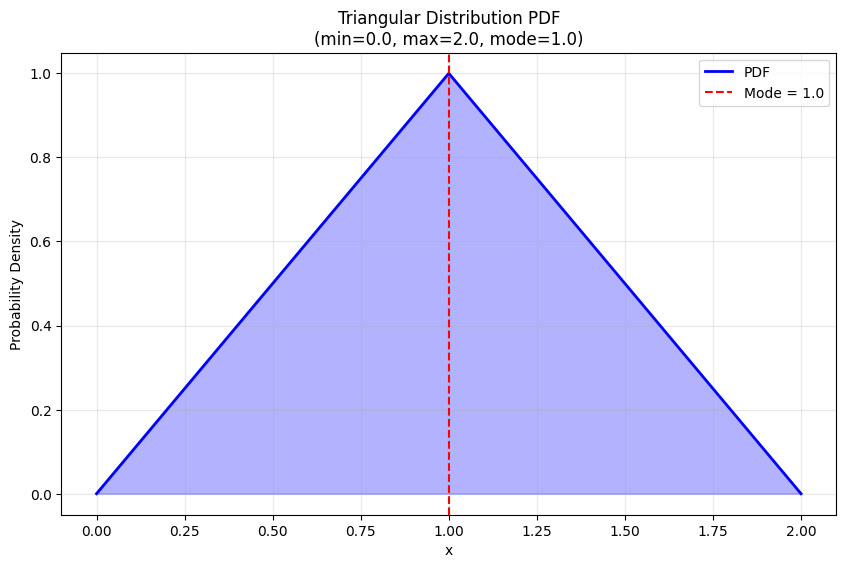

In [4]:
tri_dist.plot_pdf()

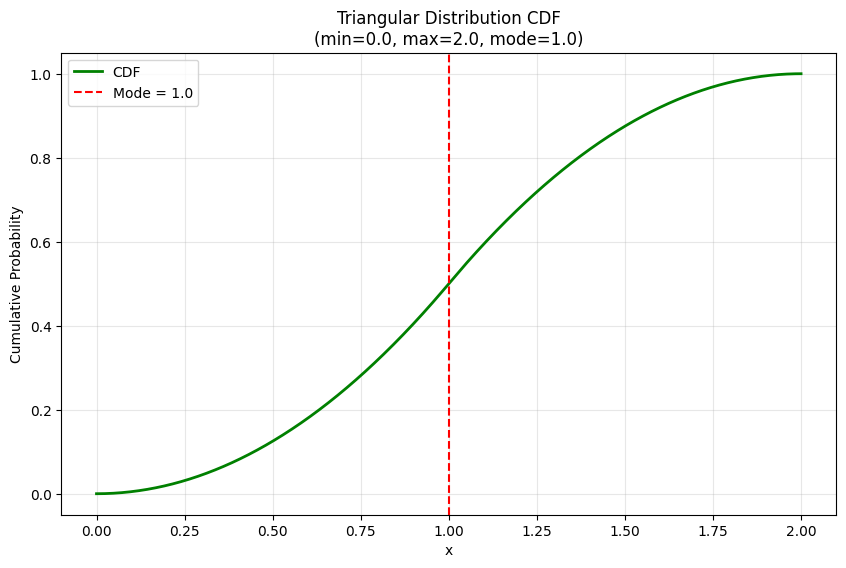

In [5]:
tri_dist.plot_cdf()

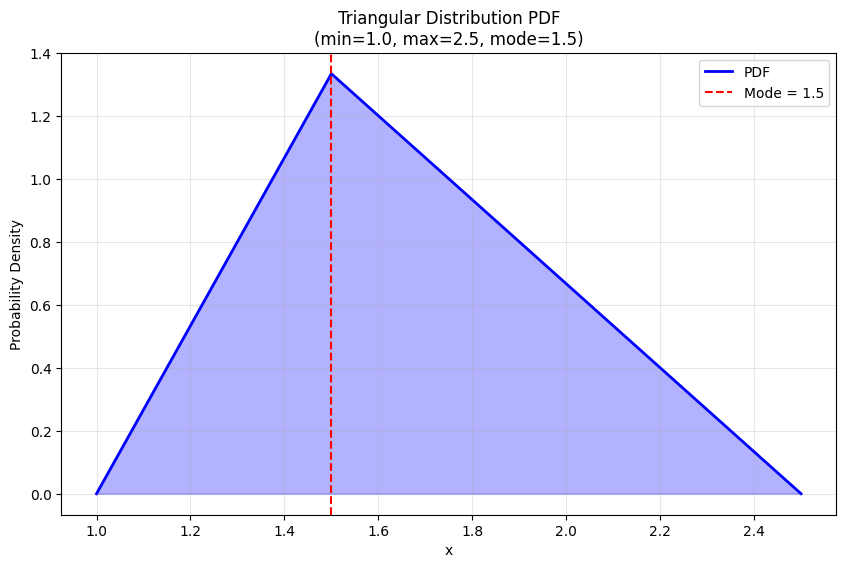

In [6]:
another_tri_dist = TriangularDistribution(1, 2.5, 1.5)

another_tri_dist.plot_pdf()

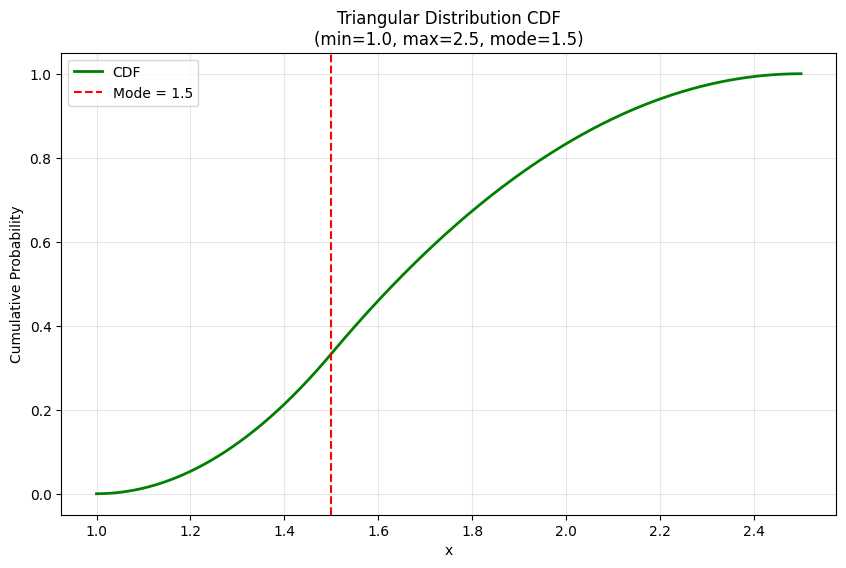

In [7]:
another_tri_dist.plot_cdf()

### Problem-13

The `rand5()` function which returns a uniform random integer within the range [1, 5], is defined as following:

```python
def rand5():
    import numpy as np
    return np.random.randint(1,6)
```

Write a function `rand7()` that will generate a uniform random integer within the range [1, 7] by only using `rand5()`. 

Note: You can call `rand5()` as many time as you want inside the function `rand7()`, but you can not use `np.random.randint(1, 8)` or any other built-in methods in python. 

In [8]:
import numpy as np

def rand5():
    """Returns a uniform random integer in the range [1, 5]"""
    import numpy as np
    return np.random.randint(1, 6)


def rand7():
    """
    Returns a uniform random integer in the range [1, 7] using only rand5().
    
    Strategy: Use rejection sampling to ensure uniform distribution.
    We generate numbers in a larger range and reject those outside [1, 7].
    """
    # Generate a number in range [1, 25]
    num = (rand5() - 1) * 5 + rand5()
    
    # Accept only numbers in range [1, 21] for uniform distribution [rejection sampling]
    if num <= 21:
        return num % 7 + 1


Distribution of 100000 samples:
Number 1: 11904 times (11.90%)
Number 2: 11909 times (11.91%)
Number 3: 11957 times (11.96%)
Number 4: 12067 times (12.07%)
Number 5: 12141 times (12.14%)
Number 6: 11980 times (11.98%)
Number 7: 11990 times (11.99%)


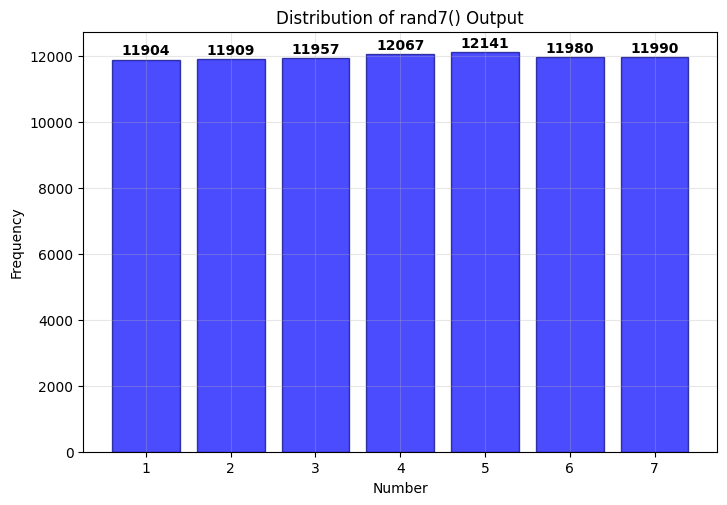

In [9]:
# Test the rand7() function for uniformity

from collections import Counter

# Generate many samples
n_samples = 100000
samples = [rand7() for _ in range(n_samples)]

# Count occurrences
counts = Counter(samples)

print(f"Distribution of {n_samples} samples:")
for i in range(1, 8):
    count = counts.get(i, 0)
    percentage = (count / n_samples) * 100
    print(f"Number {i}: {count} times ({percentage:.2f}%)")

# Create the plot
plt.figure(figsize=(18, 12))

# Bar plot
numbers = list(range(1, 8))
frequencies = [counts.get(i, 0) for i in numbers]
expected_frequency = len(samples) / 7

plt.subplot(2, 2, 1)
bars = plt.bar(numbers, frequencies, color='blue', alpha=0.7, edgecolor='navy')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Distribution of rand7() Output')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, freq in zip(bars, frequencies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
             f'{freq}', ha='center', va='bottom', fontweight='bold')

### Problem-14

A grayscale image can be represented as a matrix where the dimensions are (height, width). 
Let's consider a simplified scenario with two grayscale images, $A$ and $B$, both represented as 10×10 matrices where each element represents pixel intensity. Pixel intensity is an integer in the range [0-255].

You want to create a blended image $C$ by combining $A$ and $B$ such that $C=w_1 A+w_2 B$. This represents a weighted average blend.
Note that each element in the resultant matrix $C$ should also fall within the range [0, 255]. 

write the code of the function `blend_images(image_A, image_B, weight_A, weight_B)` that takes two matrices and two scalar weights and produces another matrix as an output by performing the above operation.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def blend_images(image_A, image_B, weight_A, weight_B):
    """
    Blend two grayscale images using weighted average.
    
    Args:
        image_A (numpy.ndarray): First grayscale image matrix
        image_B (numpy.ndarray): Second grayscale image matrix  
        weight_A (float): Weight for the first image
        weight_B (float): Weight for the second image
    
    Returns:
        numpy.ndarray: Blended image matrix with pixel intensities in range [0, 255]
    
    Raises:
        ValueError: If images have different shapes or weights are invalid
        TypeError: If inputs are not numpy arrays or numeric weights
    """
    
    # Input validation
    if not isinstance(image_A, np.ndarray) or not isinstance(image_B, np.ndarray):
        raise TypeError("Both image_A and image_B must be numpy arrays")
    
    if not isinstance(weight_A, (int, float)) or not isinstance(weight_B, (int, float)):
        raise TypeError("Both weight_A and weight_B must be numeric values")
    
    if image_A.shape != image_B.shape:
        raise ValueError("Both images must have the same shape")
    
    if weight_A < 0 or weight_B < 0:
        raise ValueError("Weights must be non-negative")
    
    # Perform weighted average blending
    # C = w1 * A + w2 * B
    blended = weight_A * image_A.astype(float) + weight_B * image_B.astype(float)
    
    # Normalize weights if they don't sum to 1 (optional, but good practice)
    total_weight = weight_A + weight_B
    if total_weight != 0:
        blended = blended / total_weight
    
    # Clip values to ensure they fall within [0, 255] range
    blended = np.clip(blended, 0, 255)
    
    # Convert back to integer type for pixel intensities
    blended = blended.astype(np.uint8)
    
    return blended


In [11]:
def create_test_images():
    """
    Create test images for demonstration.
    
    Returns:
        tuple: (image_A, image_B) - Two 10x10 test images
    """
    # Create a gradient image A (horizontal gradient)
    image_A = np.zeros((10, 10), dtype=np.uint8)
    for i in range(10):
        for j in range(10):
            image_A[i, j] = int((j / 9) * 255)  # Horizontal gradient 0 to 255
    
    # Create a gradient image B (vertical gradient)
    image_B = np.zeros((10, 10), dtype=np.uint8)
    for i in range(10):
        for j in range(10):
            image_B[i, j] = int((i / 9) * 255)  # Vertical gradient 0 to 255
    
    return image_A, image_B

def display_images(image_A, image_B, blended, title_A="Image A", title_B="Image B", title_blended="Blended Image"):
    """
    Display the original images and the blended result.
    
    Args:
        image_A (numpy.ndarray): First input image
        image_B (numpy.ndarray): Second input image
        blended (numpy.ndarray): Blended result
        title_A (str): Title for image A
        title_B (str): Title for image B
        title_blended (str): Title for blended image
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Display Image A
    axes[0].imshow(image_A, cmap='gray', vmin=0, vmax=255)
    axes[0].set_title(title_A)
    axes[0].axis('off')
    
    # Display Image B
    axes[1].imshow(image_B, cmap='gray', vmin=0, vmax=255)
    axes[1].set_title(title_B)
    axes[1].axis('off')
    
    # Display Blended Image
    axes[2].imshow(blended, cmap='gray', vmin=0, vmax=255)
    axes[2].set_title(title_blended)
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()

In [12]:
def test_blend_images():
    """
    Comprehensive test function for blend_images.
    """
    print("=== Testing blend_images Function ===\n")
    
    # Create test images
    image_A, image_B = create_test_images()
    
    print("Test Images Created:")
    print(f"Image A shape: {image_A.shape}")
    print(f"Image B shape: {image_B.shape}")
    print(f"Image A range: [{image_A.min()}, {image_A.max()}]")
    print(f"Image B range: [{image_B.min()}, {image_B.max()}]")
    print()
    
    # Test Case 1: Equal weights (50-50 blend)
    print("Test Case 1: Equal weights (w1=0.5, w2=0.5)")
    blended_50_50 = blend_images(image_A, image_B, 0.5, 0.5)
    print(f"Blended image range: [{blended_50_50.min()}, {blended_50_50.max()}]")
    print(f"Blended image shape: {blended_50_50.shape}")
    print()
    
    # Test Case 2: Image A dominant (70-30 blend)
    print("Test Case 2: Image A dominant (w1=0.7, w2=0.3)")
    blended_70_30 = blend_images(image_A, image_B, 0.7, 0.3)
    print(f"Blended image range: [{blended_70_30.min()}, {blended_70_30.max()}]")
    print()
    
    # Test Case 3: Image B dominant (30-70 blend)
    print("Test Case 3: Image B dominant (w1=0.3, w2=0.7)")
    blended_30_70 = blend_images(image_A, image_B, 0.3, 0.7)
    print(f"Blended image range: [{blended_30_70.min()}, {blended_30_70.max()}]")
    print()
    
    # Test Case 4: Only Image A (w1=1, w2=0)
    print("Test Case 4: Only Image A (w1=1, w2=0)")
    blended_A_only = blend_images(image_A, image_B, 1, 0)
    print(f"Blended image range: [{blended_A_only.min()}, {blended_A_only.max()}]")
    print(f"Are images identical to image A? {np.array_equal(blended_A_only, image_A)}")
    print()
    
    # Test Case 5: Only Image B (w1=0, w2=1)
    print("Test Case 5: Only Image B (w1=0, w2=1)")
    blended_B_only = blend_images(image_A, image_B, 0, 1)
    print(f"Blended image range: [{blended_B_only.min()}, {blended_B_only.max()}]")
    print(f"Are images identical to image B? {np.array_equal(blended_B_only, image_B)}")
    print()
    
    # Test Case 6: Unequal weights that don't sum to 1
    print("Test Case 6: Unequal weights (w1=0.8, w2=0.4)")
    blended_unequal = blend_images(image_A, image_B, 0.8, 0.4)
    print(f"Blended image range: [{blended_unequal.min()}, {blended_unequal.max()}]")
    print()
    
    # Display results
    print("Displaying test results...")
    display_images(image_A, image_B, blended_50_50, 
                   "Image A (Horizontal Gradient)", 
                   "Image B (Vertical Gradient)", 
                   "50-50 Blend")

=== Testing blend_images Function ===

Test Images Created:
Image A shape: (10, 10)
Image B shape: (10, 10)
Image A range: [0, 255]
Image B range: [0, 255]

Test Case 1: Equal weights (w1=0.5, w2=0.5)
Blended image range: [0, 255]
Blended image shape: (10, 10)

Test Case 2: Image A dominant (w1=0.7, w2=0.3)
Blended image range: [0, 255]

Test Case 3: Image B dominant (w1=0.3, w2=0.7)
Blended image range: [0, 255]

Test Case 4: Only Image A (w1=1, w2=0)
Blended image range: [0, 255]
Are images identical to image A? True

Test Case 5: Only Image B (w1=0, w2=1)
Blended image range: [0, 255]
Are images identical to image B? True

Test Case 6: Unequal weights (w1=0.8, w2=0.4)
Blended image range: [0, 254]

Displaying test results...


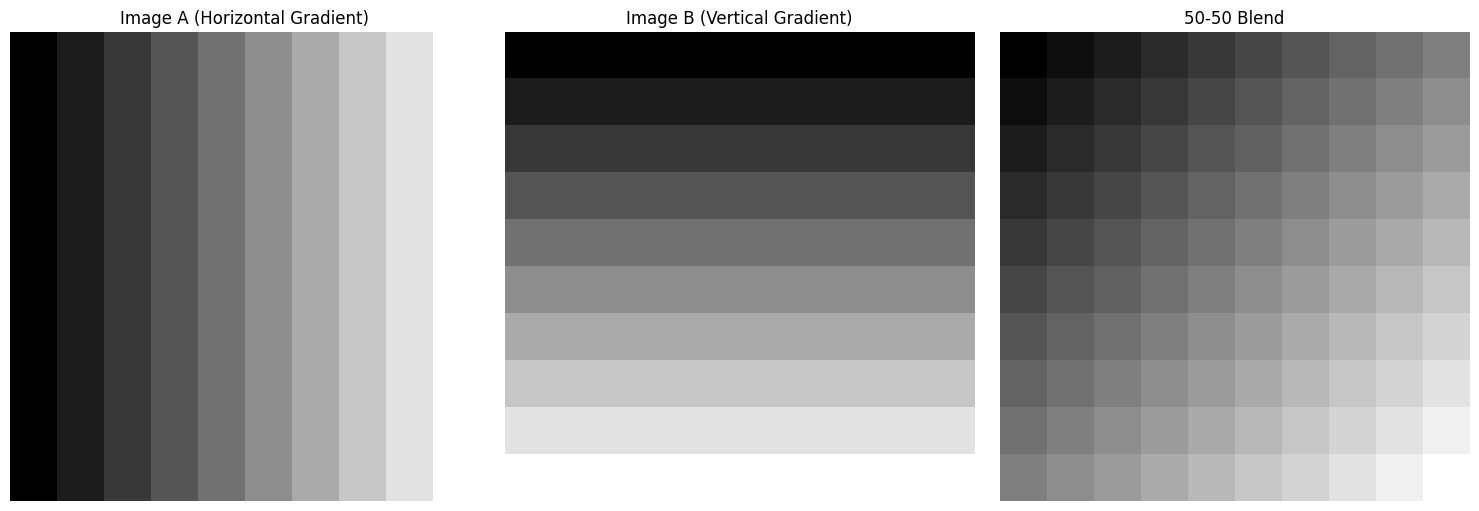

In [13]:
test_blend_images()

### Problem-15

Calculate the eigen values and eigen vectors of the following matrices.

$A = \begin{bmatrix}
5 & 2 \\
2 & 2
\end{bmatrix}$      

$B = \begin{bmatrix}
1 & 1 & 0\\
0 & 2 & 0\\
-1 & 1 & 3
\end{bmatrix}$

In [14]:
import numpy as np
import numpy.linalg as LA

def calculate_eigenvalues_eigenvectors(matrix, matrix_name="Matrix", verify=True):
    """
    Calculate eigenvalues and eigenvectors of a matrix using numpy.linalg.
    
    Args:
        matrix (numpy.ndarray): Input matrix
        matrix_name (str): Name of the matrix for display purposes
    
    Returns:
        tuple: (eigenvalues, eigenvectors)
    """
    print(f"\n{'='*60}")
    print(f"EIGENVALUES AND EIGENVECTORS FOR {matrix_name}")
    print(f"{'='*60}")
    
    # Display the matrix
    print(f"\n{matrix_name}:")
    print(matrix)
    print(f"\nMatrix shape: {matrix.shape}")
    print(f"Matrix determinant: {LA.det(matrix):.6f}")
    print(f"Matrix trace: {np.trace(matrix):.6f}")
    
    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = LA.eig(matrix)
    
    # Sort eigenvalues and corresponding eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    print(f"\nEIGENVALUES (sorted in descending order):")
    for i, eigenvalue in enumerate(eigenvalues):
        print(f"λ{i+1} = {eigenvalue:.6f}")
    
    print(f"\nEIGENVECTORS (corresponding to sorted eigenvalues):")
    for i in range(len(eigenvalues)):
        eigenvector = eigenvectors[:, i]
        print(f"v{i+1} = {eigenvector}")
        # Normalize the eigenvector
        normalized_eigenvector = eigenvector / LA.norm(eigenvector)
        print(f"Normalized v{i+1} = {normalized_eigenvector}")
    
    if verify:
    # Verification: Check if Av = λv
        print(f"\nVERIFICATION (Av = λv):")
        for i in range(len(eigenvalues)):
            eigenvalue = eigenvalues[i]
            eigenvector = eigenvectors[:, i]
            
            # Calculate Av
            Av = matrix @ eigenvector
            # Calculate λv
            lambda_v = eigenvalue * eigenvector
            
            print(f"\nFor eigenvalue λ{i+1} = {eigenvalue:.6f}:")
            print(f"Av = {Av}")
            print(f"λv = {lambda_v}")
            print(f"Difference (Av - λv) = {Av - lambda_v}")
            print(f"Norm of difference: {LA.norm(Av - lambda_v):.2e}")
            
            # Check if the difference is close to zero
            if LA.norm(Av - lambda_v) < 1e-10:
                print("Verification passed: Av = λv")
            else:
                print("Verification failed: Av ≠ λv")

    return eigenvalues, eigenvectors

In [15]:
# Matrix A: 2x2 matrix
A = np.array([[5, 2],
                [2, 2]], dtype=float)

# Calculate eigenvalues and eigenvectors for matrix A
eigenvalues_A, eigenvectors_A = calculate_eigenvalues_eigenvectors(A, "MATRIX A", verify=False)
print(f"{'='*60}")
print(f"Matrix A eigenvalues: {eigenvalues_A}")
print(f"Matrix A eigenvectors:\n {eigenvectors_A}")


EIGENVALUES AND EIGENVECTORS FOR MATRIX A

MATRIX A:
[[5. 2.]
 [2. 2.]]

Matrix shape: (2, 2)
Matrix determinant: 6.000000
Matrix trace: 7.000000

EIGENVALUES (sorted in descending order):
λ1 = 6.000000
λ2 = 1.000000

EIGENVECTORS (corresponding to sorted eigenvalues):
v1 = [0.89442719 0.4472136 ]
Normalized v1 = [0.89442719 0.4472136 ]
v2 = [-0.4472136   0.89442719]
Normalized v2 = [-0.4472136   0.89442719]
Matrix A eigenvalues: [6. 1.]
Matrix A eigenvectors:
 [[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]


In [16]:
# Matrix B: 3x3 matrix
B = np.array([[1, 1, 0],
                [0, 2, 0],
                [-1, 1, 3]], dtype=float)

# Calculate eigenvalues and eigenvectors for matrix A
eigenvalues_B, eigenvectors_B = calculate_eigenvalues_eigenvectors(B, "MATRIX B", verify=False)
print(f"{'='*60}")
print(f"Matrix B eigenvalues: {eigenvalues_B}")
print(f"Matrix B eigenvectors:\n {eigenvectors_B}")


EIGENVALUES AND EIGENVECTORS FOR MATRIX B

MATRIX B:
[[ 1.  1.  0.]
 [ 0.  2.  0.]
 [-1.  1.  3.]]

Matrix shape: (3, 3)
Matrix determinant: 6.000000
Matrix trace: 6.000000

EIGENVALUES (sorted in descending order):
λ1 = 3.000000
λ2 = 2.000000
λ3 = 1.000000

EIGENVECTORS (corresponding to sorted eigenvalues):
v1 = [0. 0. 1.]
Normalized v1 = [0. 0. 1.]
v2 = [0.70710678 0.70710678 0.        ]
Normalized v2 = [0.70710678 0.70710678 0.        ]
v3 = [0.89442719 0.         0.4472136 ]
Normalized v3 = [0.89442719 0.         0.4472136 ]
Matrix B eigenvalues: [3. 2. 1.]
Matrix B eigenvectors:
 [[0.         0.70710678 0.89442719]
 [0.         0.70710678 0.        ]
 [1.         0.         0.4472136 ]]
